# LightGBM SHAP for predicting use of thrombolysis

This model use 10 features:

* stroke_team_id
* stroke_severity
* prior_disability
* age
* infarction
* onset_to_arrival_time
* precise_onset_known
* onset_during_sleep
* arrival_to_scan_time
* afib_anticoagulant

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

from dataclasses import dataclass
from lightgbm import LGBMClassifier

## Set up paths and filenames

In [2]:
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    data_read_path: str = './data/'
    output_folder = './output/'
    model_folder = './models'
    notebook: str = '02'

paths = Paths()

## Load data

In [3]:
# Load data
train = pd.read_csv(paths.data_read_path + 'cohort_10000_train.csv')
train['stroke_team_id'] = train['stroke_team_id'].astype('category')
test = pd.read_csv(paths.data_read_path + 'cohort_10000_test.csv')
test['stroke_team_id'] = test['stroke_team_id'].astype('category')

# Split X and y
X_train = train.drop('thrombolysis', axis=1)
X_test = test.drop('thrombolysis', axis=1)
y_train = train['thrombolysis']
y_test = test['thrombolysis']

## Fit model

In [4]:
# Define model
model = LGBMClassifier(random_state=42)

# Fit model
model.fit(X_train, y_train)

# Get predictions
predicted = model.predict(X_test)
predicted_proba = model.predict_proba(X_test)[:,1]

# Show overall accuracy
accuracy = np.mean(predicted == y_test)
print (f'Accuracy: {accuracy:.3f}')

Accuracy: 0.854


## Fit SHAP

In [6]:
explainer = shap.TreeExplainer(model)
shap_values_extended = explainer(X_test)
shap_values_extended[0]

.values =
array([[-0.18131413,  0.18131413],
       [-0.98793933,  0.98793933],
       [ 0.58274526, -0.58274526],
       [ 0.06242676, -0.06242676],
       [-1.28228229,  1.28228229],
       [-0.09697888,  0.09697888],
       [-0.37378052,  0.37378052],
       [-0.0661071 ,  0.0661071 ],
       [-0.60938188,  0.60938188],
       [-0.24000247,  0.24000247]])

.base_values =
array([ 2.51522234, -2.51522234])

.data =
array([90. ,  8. ,  3. , 82.5,  1. , 83. ,  1. ,  0. , 20. ,  0. ])

## Show example waterfall plot

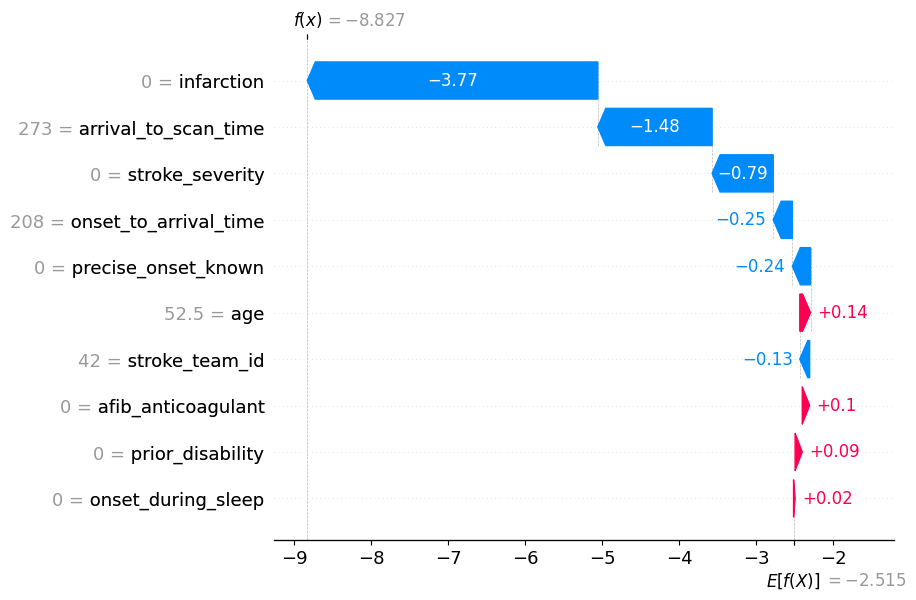

In [7]:
# For LightGBM, need to construct a new object for plotting waterfall
class Shap_array:
    def __init__(self, shap_values_extended, row, class_index):
        self.values = shap_values_extended[row][:, class_index].values
        self.base_values = shap_values_extended[row].base_values[class_index]
        self.data = shap_values_extended[row].data
        self.display_data = shap_values_extended.display_data
        self.feature_names = shap_values_extended.feature_names

row = 100
class_index = 1

shap.waterfall_plot(Shap_array(shap_values_extended, row, class_index))